In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kunalgupta2616/dog-vs-cat-images-data")

print("Path to dataset files:", path)

100%|██████████| 991M/991M [00:11<00:00, 89.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kunalgupta2616/dog-vs-cat-images-data/versions/1


In [3]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
100% 989M/991M [00:05<00:00, 161MB/s]
100% 991M/991M [00:05<00:00, 187MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dog-vs-cat-images-data.zip")
zip_ref.extractall("/content")
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dog-vs-cat-images-data.zip' mode='r'>>

In [5]:
import tensorflow as tf
import keras
from keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout


In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogcat/train",
    labels='inferred',
    label_mode="int",
    image_size=(256,256),
    batch_size=32
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogcat/validation",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    batch_size=32
)


Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [7]:
# Normalization
def procces(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(procces)
validation_ds=validation_ds.map(procces)

In [8]:
#Create Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:
import os
from PIL import Image

validation_folder = "/content/dogcat/train"  # or test folder if you want
bad_files = []

for root, dirs, files in os.walk(validation_folder):
    for file in files:
        path = os.path.join(root, file)
        if os.path.isfile(path):  # ensure it's a file
            try:
                img = Image.open(path)
                img.verify()  # check if file is valid image
            except:
                bad_files.append(path)

print(f"Found {len(bad_files)} bad image files.")
print(bad_files[:10])  # preview first 10 bad files

# Optionally remove only the bad files
for f in bad_files:
    os.remove(f)

print("Bad files removed successfully!")


Found 0 bad image files.
[]
Bad files removed successfully!


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
history=model.fit(train_ds,epochs=10,batch_size=32,validation_data=validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9773 - loss: 0.0724 - val_accuracy: 0.9803 - val_loss: 0.0535
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9812 - loss: 0.0585 - val_accuracy: 0.9699 - val_loss: 0.1100
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9855 - loss: 0.0425 - val_accuracy: 0.9581 - val_loss: 0.1235
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9849 - loss: 0.0451 - val_accuracy: 0.9276 - val_loss: 0.2115
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9902 - loss: 0.0349 - val_accuracy: 0.9930 - val_loss: 0.0229
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.8244 - val_loss: 0.5097
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.9884 - loss: 0.035

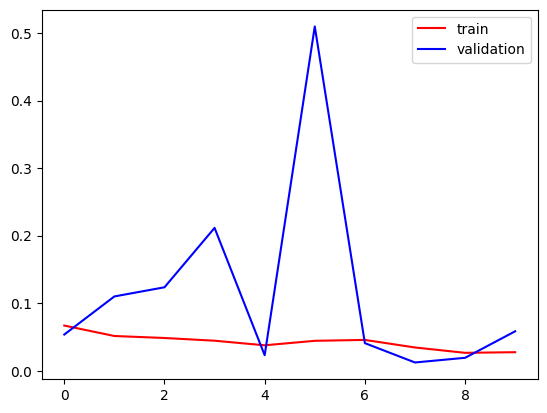

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()


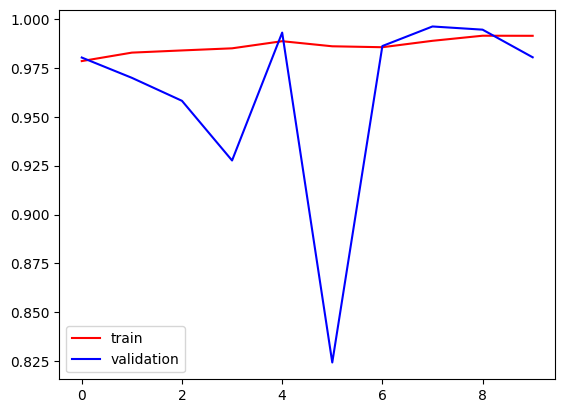

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()


In [ ]:
# import tensorflow as tf
# import numpy as np

# # Path to your test image
# img_path = "/content/pexels-pixabay-45201.jpg"

# # Load the image and resize to training size
# img = tf.keras.utils.load_img(img_path, target_size=(256, 256))  # same size as training
# img_array = tf.keras.utils.img_to_array(img)  # convert to numpy array
# img_array = np.expand_dims(img_array, axis=0)  # add batch dimension [1, 256, 256, 3]
# img_array = img_array / 255.0  # normalize like training data


In [ ]:
prediction = model.predict(img_array)

print("Raw prediction:", prediction)


In [20]:
model.save("model.keras")